In [8]:
import quandl

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
apiKey = os.getenv("quandl_key")

h1PyXBxVsprTiGzqKsd_


In [4]:
print(os.getenv("GOPATH"))

/Users/screative/go


In [4]:
# quandl.ApiConfig.api_key = "h1PyXBxVsprTiGzqKsd_"
quandl.ApiConfig.api_key = apiKey


In [5]:
amzn = quandl.get("WIKI/AMZN", start_date="2010-10-01", end_date="2020-01-01")

In [6]:
amzn.head()
# Sample: https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-10-01,157.06,157.44,152.20,153.71,8683400.0,0.0,1.0,157.06,157.44,152.20,153.71,8683400.0
2010-10-04,153.95,155.96,152.79,155.39,5346500.0,0.0,1.0,153.95,155.96,152.79,155.39,5346500.0
2010-10-05,157.08,161.21,157.01,160.87,5620000.0,0.0,1.0,157.08,161.21,157.01,160.87,5620000.0
2010-10-06,160.60,160.68,154.60,155.40,6060800.0,0.0,1.0,160.60,160.68,154.60,155.40,6060800.0
2010-10-07,156.51,157.40,153.39,156.27,4622000.0,0.0,1.0,156.51,157.40,153.39,156.27,4622000.0


In [7]:
amzn_daily_close = amzn[['Adj. Close']]
amzn_daily_pct_c = amzn_daily_close.pct_change()
amzn_daily_pct_c.fillna(0, inplace=True)
amzn_daily_pct_c.head()

,Adj. Close
Date,
2010-10-01,0.000000
2010-10-04,0.010930
2010-10-05,0.035266
2010-10-06,-0.034003
2010-10-07,0.005598


In [10]:
amzn_daily_log_returns = np.log(amzn_daily_close.pct_change() + 1)
amzn_daily_log_returns.head()

,Adj. Close
Date,
2010-10-01,NaN
2010-10-04,0.010870
2010-10-05,0.034658
2010-10-06,-0.034594
2010-10-07,0.005583


In [11]:
monthly = amzn.resample('BM').apply(lambda x: x[-1])
monthly.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-30,0.067250,0.054599,0.061222,0.061551,0.352846,NaN,0.0,0.067250,0.054599,0.061222,0.061551,0.352846
2010-12-31,0.028313,0.025886,0.026358,0.026226,-0.489530,NaN,0.0,0.028313,0.025886,0.026358,0.026226,-0.489530
2011-01-31,-0.064849,-0.059572,-0.067406,-0.057556,0.946204,NaN,0.0,-0.064849,-0.059572,-0.067406,-0.057556,0.946204
2011-02-28,0.022038,0.025957,0.028314,0.021516,0.009690,NaN,0.0,0.022038,0.025957,0.028314,0.021516,0.009690
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-30,0.052390,0.061258,0.053473,0.064662,0.285281,NaN,0.0,0.052390,0.061258,0.053473,0.064662,0.285281
2017-12-29,0.013067,0.004607,0.006466,-0.006187,-0.404230,NaN,0.0,0.013067,0.004607,0.006466,-0.006187,-0.404230
2018-01-31,0.227471,0.243733,0.242004,0.241289,1.369419,NaN,0.0,0.227471,0.243733,0.242004,0.241289,1.369419


In [12]:
quarter = amzn.resample('4M').mean()
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.106004,0.103239,0.109557,0.104766,-0.222010,NaN,0.0,0.106004,0.103239,0.109557,0.104766,-0.222010
2011-06-30,0.043115,0.045499,0.042696,0.044538,-0.038810,NaN,0.0,0.043115,0.045499,0.042696,0.044538,-0.038810
2011-10-31,0.165301,0.170107,0.155432,0.163410,0.273683,NaN,0.0,0.165301,0.170107,0.155432,0.163410,0.273683
2012-02-29,-0.120387,-0.124238,-0.118136,-0.121646,-0.022768,NaN,0.0,-0.120387,-0.124238,-0.118136,-0.121646,-0.022768
2012-06-30,0.085079,0.085691,0.092324,0.088634,-0.290301,NaN,0.0,0.085079,0.085691,0.092324,0.088634,-0.290301
2012-10-31,0.168409,0.164556,0.167204,0.164882,-0.251272,NaN,0.0,0.168409,0.164556,0.167204,0.164882,-0.251272
2013-02-28,0.058786,0.059925,0.058478,0.059336,0.030805,NaN,0.0,0.058786,0.059925,0.058478,0.059336,0.030805
2013-06-30,0.044138,0.043870,0.045543,0.045596,-0.131551,NaN,0.0,0.044138,0.043870,0.045543,0.045596,-0.131551


In [13]:
amzn_daily_pct_chg = amzn_daily_close/amzn_daily_close.shift(1) -1
amzn_daily_pct_chg.head()

,Adj. Close
Date,
2010-10-01,NaN
2010-10-04,0.010930
2010-10-05,0.035266
2010-10-06,-0.034003
2010-10-07,0.005598


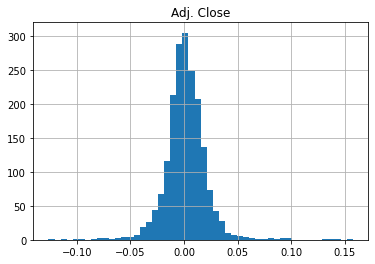

In [36]:
amzn_daily_pct_chg.hist(bins=50)
plt.show()

In [15]:
amzn_daily_pct_chg.describe()

,Adj. Close
count,1881.000000
mean,0.001399
std,0.019473
min,-0.126568
25%,-0.008168
50%,0.000930
75%,0.011630
max,0.157457


In [16]:
amzn_cum_daily_return = (1 + amzn_daily_pct_chg).cumprod()

In [17]:
amzn_cum_daily_return.head()

,Adj. Close
Date,
2010-10-01,NaN
2010-10-04,1.010930
2010-10-05,1.046581
2010-10-06,1.010995
2010-10-07,1.016655


<AxesSubplot:xlabel='Date'>

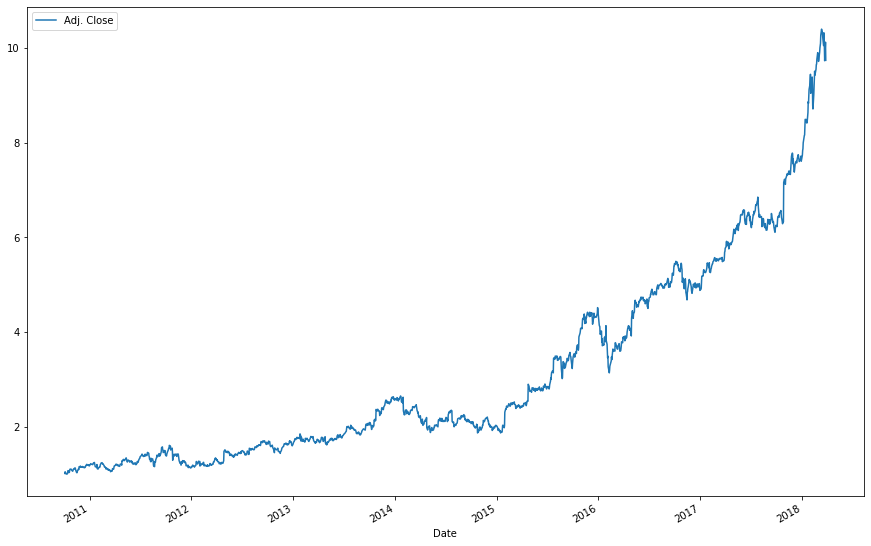

In [32]:
amzn_cum_daily_return.plot(figsize=(15,10))

In [25]:
amzn_cum_monthly_return = amzn_cum_daily_return.resample("M").mean()
amzn_cum_monthly_return

,Adj. Close
Date,
2010-10-31,1.048032
2010-11-30,1.096360
2010-12-31,1.163484
2011-01-31,1.186341
2011-02-28,1.178309
...,...
2017-11-30,7.417569
2017-12-31,7.604199
2018-01-31,8.516343


In [26]:
adj_close_px = amzn['Adj. Close']
moving_avg = adj_close_px.rolling(window=40).mean()

In [28]:
moving_avg[-10:]

Date
2018-03-14    1448.42575
2018-03-15    1455.60875
2018-03-16    1462.56775
2018-03-19    1468.82650
2018-03-20    1475.30650
2018-03-21    1480.78950
2018-03-22    1485.45425
2018-03-23    1488.39450
2018-03-26    1492.23975
2018-03-27    1494.22400
Name: Adj. Close, dtype: float64

<AxesSubplot:xlabel='Date'>

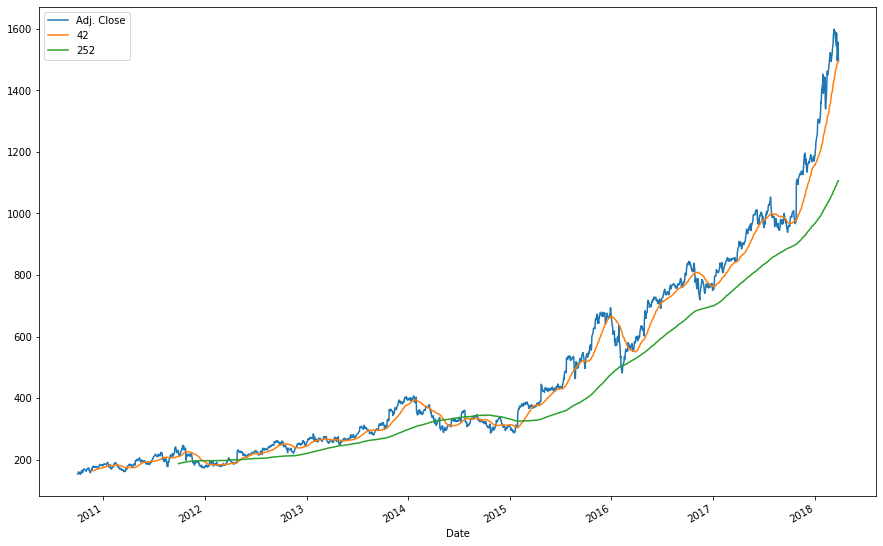

In [37]:
amzn['42'] = adj_close_px.rolling(window=40).mean()
amzn['252'] = adj_close_px.rolling(window=252).mean()
amzn[['Adj. Close', '42', '252']].plot(figsize=(15,10))

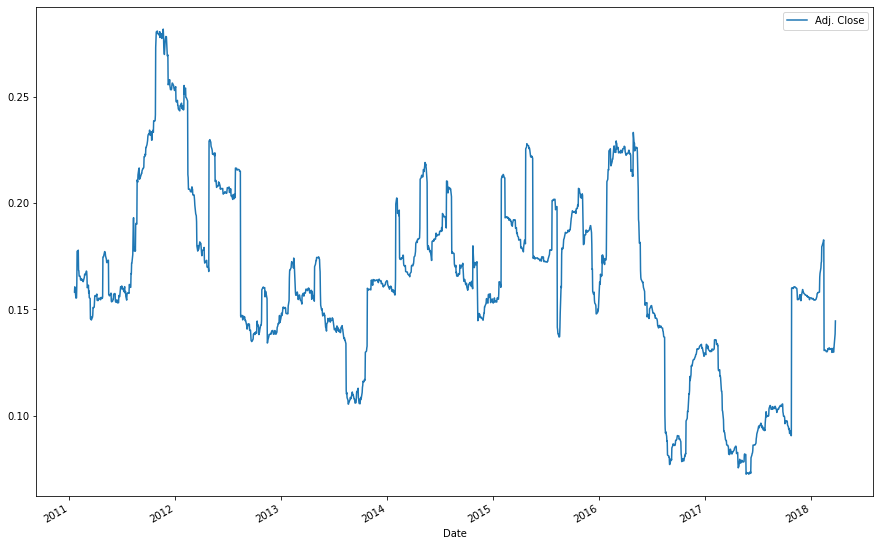

In [38]:
min_periods = 75
vol = amzn_daily_pct_chg.rolling(min_periods).std() * np.sqrt(min_periods)
vol.plot(figsize=(15,10))
plt.show()